In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (10, 6)

In [6]:
customers = pd.read_csv("Customers.csv")
products = pd.read_csv("Products.csv")
transactions = pd.read_csv("Transactions.csv")

In [8]:
print("Customers Data:")
print(customers.head(), "\n")

Customers Data:
  CustomerID        CustomerName         Region  SignupDate
0      C0001    Lawrence Carroll  South America  2022-07-10
1      C0002      Elizabeth Lutz           Asia  2022-02-13
2      C0003      Michael Rivera  South America  2024-03-07
3      C0004  Kathleen Rodriguez  South America  2022-10-09
4      C0005         Laura Weber           Asia  2022-08-15 



In [10]:
customers.head()

,CustomerID,CustomerName,Region,SignupDate
0,C0001,Lawrence Carroll,South America,2022-07-10
1,C0002,Elizabeth Lutz,Asia,2022-02-13
2,C0003,Michael Rivera,South America,2024-03-07
3,C0004,Kathleen Rodriguez,South America,2022-10-09
4,C0005,Laura Weber,Asia,2022-08-15


In [12]:
print("Products Data:")
print(products.head(), "\n")

Products Data:
  ProductID              ProductName     Category   Price
0      P001     ActiveWear Biography        Books  169.30
1      P002    ActiveWear Smartwatch  Electronics  346.30
2      P003  ComfortLiving Biography        Books   44.12
3      P004            BookWorld Rug   Home Decor   95.69
4      P005          TechPro T-Shirt     Clothing  429.31 



In [14]:
print("Transactions Data:")
print(transactions.head(), "\n")

Transactions Data:
  TransactionID CustomerID ProductID      TransactionDate  Quantity  \
0        T00001      C0199      P067  2024-08-25 12:38:23         1   
1        T00112      C0146      P067  2024-05-27 22:23:54         1   
2        T00166      C0127      P067  2024-04-25 07:38:55         1   
3        T00272      C0087      P067  2024-03-26 22:55:37         2   
4        T00363      C0070      P067  2024-03-21 15:10:10         3   

   TotalValue   Price  
0      300.68  300.68  
1      300.68  300.68  
2      300.68  300.68  
3      601.36  300.68  
4      902.04  300.68   



In [16]:
transactions.head()

,TransactionID,CustomerID,ProductID,TransactionDate,Quantity,TotalValue,Price
0,T00001,C0199,P067,2024-08-25 12:38:23,1,300.68,300.68
1,T00112,C0146,P067,2024-05-27 22:23:54,1,300.68,300.68
2,T00166,C0127,P067,2024-04-25 07:38:55,1,300.68,300.68
3,T00272,C0087,P067,2024-03-26 22:55:37,2,601.36,300.68
4,T00363,C0070,P067,2024-03-21 15:10:10,3,902.04,300.68


In [18]:
print("Missing Values:\n")
print("Customers:\n", customers.isnull().sum(), "\n")
print("Products:\n", products.isnull().sum(), "\n")
print("Transactions:\n", transactions.isnull().sum(), "\n")

Missing Values:

Customers:
 CustomerID      0
CustomerName    0
Region          0
SignupDate      0
dtype: int64 

Products:
 ProductID      0
ProductName    0
Category       0
Price          0
dtype: int64 

Transactions:
 TransactionID      0
CustomerID         0
ProductID          0
TransactionDate    0
Quantity           0
TotalValue         0
Price              0
dtype: int64 



In [20]:
customers['SignupDate'] = pd.to_datetime(customers['SignupDate'])
transactions['TransactionDate'] = pd.to_datetime(transactions['TransactionDate'])


In [22]:
customers.head()

,CustomerID,CustomerName,Region,SignupDate
0,C0001,Lawrence Carroll,South America,2022-07-10
1,C0002,Elizabeth Lutz,Asia,2022-02-13
2,C0003,Michael Rivera,South America,2024-03-07
3,C0004,Kathleen Rodriguez,South America,2022-10-09
4,C0005,Laura Weber,Asia,2022-08-15


In [24]:
transactions.head()

,TransactionID,CustomerID,ProductID,TransactionDate,Quantity,TotalValue,Price
0,T00001,C0199,P067,2024-08-25 12:38:23,1,300.68,300.68
1,T00112,C0146,P067,2024-05-27 22:23:54,1,300.68,300.68
2,T00166,C0127,P067,2024-04-25 07:38:55,1,300.68,300.68
3,T00272,C0087,P067,2024-03-26 22:55:37,2,601.36,300.68
4,T00363,C0070,P067,2024-03-21 15:10:10,3,902.04,300.68


In [26]:
print("Duplicate Rows in Customers:", customers.duplicated().sum())
print("Duplicate Rows in Products:", products.duplicated().sum())
print("Duplicate Rows in Transactions:", transactions.duplicated().sum())

Duplicate Rows in Customers: 0
Duplicate Rows in Products: 0
Duplicate Rows in Transactions: 0


In [28]:
merged_data = pd.merge(transactions, customers, on="CustomerID", how="inner")
merged_data = pd.merge(merged_data, products, on="ProductID", how="inner")

In [30]:
print("Merged Data:")
print(merged_data.head(), "\n")

Merged Data:
  TransactionID CustomerID ProductID     TransactionDate  Quantity  \
0        T00001      C0199      P067 2024-08-25 12:38:23         1   
1        T00112      C0146      P067 2024-05-27 22:23:54         1   
2        T00166      C0127      P067 2024-04-25 07:38:55         1   
3        T00272      C0087      P067 2024-03-26 22:55:37         2   
4        T00363      C0070      P067 2024-03-21 15:10:10         3   

   TotalValue  Price_x     CustomerName         Region SignupDate  \
0      300.68   300.68   Andrea Jenkins         Europe 2022-12-03   
1      300.68   300.68  Brittany Harvey           Asia 2024-09-04   
2      300.68   300.68  Kathryn Stevens         Europe 2024-04-04   
3      601.36   300.68  Travis Campbell  South America 2024-04-11   
4      902.04   300.68    Timothy Perez         Europe 2022-03-15   

                       ProductName     Category  Price_y  
0  ComfortLiving Bluetooth Speaker  Electronics   300.68  
1  ComfortLiving Bluetooth Speake

In [32]:
merged_data.head()

,TransactionID,CustomerID,ProductID,TransactionDate,Quantity,TotalValue,Price_x,CustomerName,Region,SignupDate,ProductName,Category,Price_y
0,T00001,C0199,P067,2024-08-25 12:38:23,1,300.68,300.68,Andrea Jenkins,Europe,2022-12-03,ComfortLiving Bluetooth Speaker,Electronics,300.68
1,T00112,C0146,P067,2024-05-27 22:23:54,1,300.68,300.68,Brittany Harvey,Asia,2024-09-04,ComfortLiving Bluetooth Speaker,Electronics,300.68
2,T00166,C0127,P067,2024-04-25 07:38:55,1,300.68,300.68,Kathryn Stevens,Europe,2024-04-04,ComfortLiving Bluetooth Speaker,Electronics,300.68
3,T00272,C0087,P067,2024-03-26 22:55:37,2,601.36,300.68,Travis Campbell,South America,2024-04-11,ComfortLiving Bluetooth Speaker,Electronics,300.68
4,T00363,C0070,P067,2024-03-21 15:10:10,3,902.04,300.68,Timothy Perez,Europe,2022-03-15,ComfortLiving Bluetooth Speaker,Electronics,300.68


In [34]:
merged_data.tail()

,TransactionID,CustomerID,ProductID,TransactionDate,Quantity,TotalValue,Price_x,CustomerName,Region,SignupDate,ProductName,Category,Price_y
995,T00496,C0118,P037,2024-10-24 08:30:27,1,459.86,459.86,Jacob Holt,South America,2022-01-22,SoundWave Smartwatch,Electronics,459.86
996,T00759,C0059,P037,2024-06-04 02:15:24,3,1379.58,459.86,Mrs. Kimberly Wright,North America,2024-04-07,SoundWave Smartwatch,Electronics,459.86
997,T00922,C0018,P037,2024-04-05 13:05:32,4,1839.44,459.86,Tyler Haynes,North America,2024-09-21,SoundWave Smartwatch,Electronics,459.86
998,T00959,C0115,P037,2024-09-29 10:16:02,2,919.72,459.86,Joshua Hamilton,Asia,2024-11-11,SoundWave Smartwatch,Electronics,459.86
999,T00992,C0024,P037,2024-04-21 10:52:24,1,459.86,459.86,Michele Cooley,North America,2024-02-05,SoundWave Smartwatch,Electronics,459.86


In [36]:
identical_columns = []

for col1 in merged_data.columns:
    for col2 in merged_data.columns:
        if col1 != col2 and merged_data[col1].equals(merged_data[col2]):
            identical_columns.append((col1, col2))

# Print results
if identical_columns:
    print("Identical Columns Found:")
    for pair in identical_columns:
        print(f"Column '{pair[0]}' is identical to Column '{pair[1]}'")
else:
    print("No identical columns found.")


Identical Columns Found:
Column 'Price_x' is identical to Column 'Price_y'
Column 'Price_y' is identical to Column 'Price_x'


In [38]:
if 'Price_x' in merged_data.columns and 'Price_y' in merged_data.columns:
    if merged_data['Price_x'].equals(merged_data['Price_y']):
        print("Columns 'Price_x' and 'Price_y' are identical. Dropping 'Price_y' and renaming 'Price_x' to 'Price'.")
        # Drop 'Price_y' and rename 'Price_x' to 'Price'
        merged_data = merged_data.drop(columns=['Price_y']).rename(columns={'Price_x': 'Price'})
    else:
        print("Columns 'Price_x' and 'Price_y' are not identical. Keeping both for now.")
else:
    print("No columns 'Price_x' and 'Price_y' found.")

# Print updated columns to confirm the changes
print("Updated Columns:", merged_data.columns)


Columns 'Price_x' and 'Price_y' are identical. Dropping 'Price_y' and renaming 'Price_x' to 'Price'.
Updated Columns: Index(['TransactionID', 'CustomerID', 'ProductID', 'TransactionDate',
       'Quantity', 'TotalValue', 'Price', 'CustomerName', 'Region',
       'SignupDate', 'ProductName', 'Category'],
      dtype='object')


In [40]:
merged_data.head()

,TransactionID,CustomerID,ProductID,TransactionDate,Quantity,TotalValue,Price,CustomerName,Region,SignupDate,ProductName,Category
0,T00001,C0199,P067,2024-08-25 12:38:23,1,300.68,300.68,Andrea Jenkins,Europe,2022-12-03,ComfortLiving Bluetooth Speaker,Electronics
1,T00112,C0146,P067,2024-05-27 22:23:54,1,300.68,300.68,Brittany Harvey,Asia,2024-09-04,ComfortLiving Bluetooth Speaker,Electronics
2,T00166,C0127,P067,2024-04-25 07:38:55,1,300.68,300.68,Kathryn Stevens,Europe,2024-04-04,ComfortLiving Bluetooth Speaker,Electronics
3,T00272,C0087,P067,2024-03-26 22:55:37,2,601.36,300.68,Travis Campbell,South America,2024-04-11,ComfortLiving Bluetooth Speaker,Electronics
4,T00363,C0070,P067,2024-03-21 15:10:10,3,902.04,300.68,Timothy Perez,Europe,2022-03-15,ComfortLiving Bluetooth Speaker,Electronics


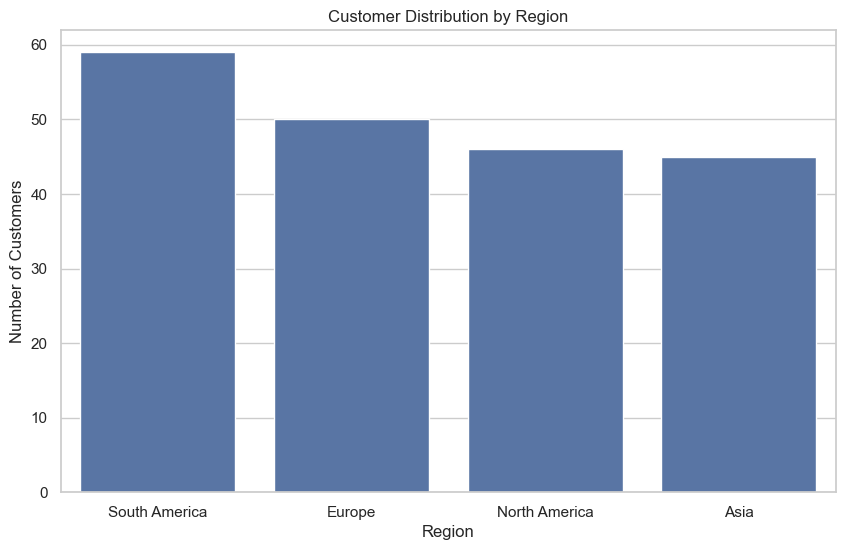

In [59]:
region_counts = customers['Region'].value_counts()
sns.barplot(x=region_counts.index, y=region_counts.values)
plt.title("Customer Distribution by Region")
plt.xlabel("Region")
plt.ylabel("Number of Customers")
plt.savefig('bar_plot.png')
plt.show()

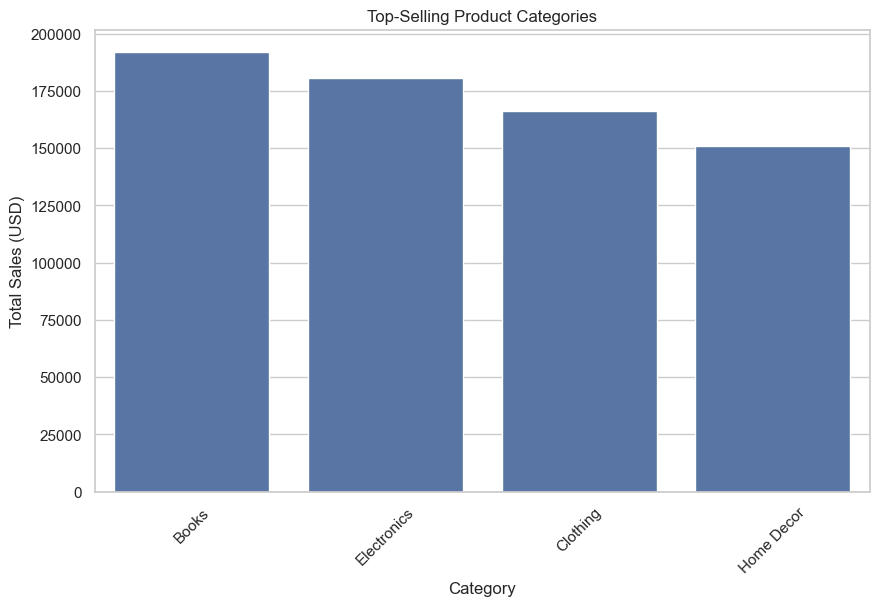

In [61]:
category_sales = merged_data.groupby('Category')['TotalValue'].sum().sort_values(ascending=False)
sns.barplot(x=category_sales.index, y=category_sales.values)
plt.title("Top-Selling Product Categories")
plt.xlabel("Category")
plt.ylabel("Total Sales (USD)")
plt.xticks(rotation=45)
plt.savefig('bar2_plot.png')
plt.show()

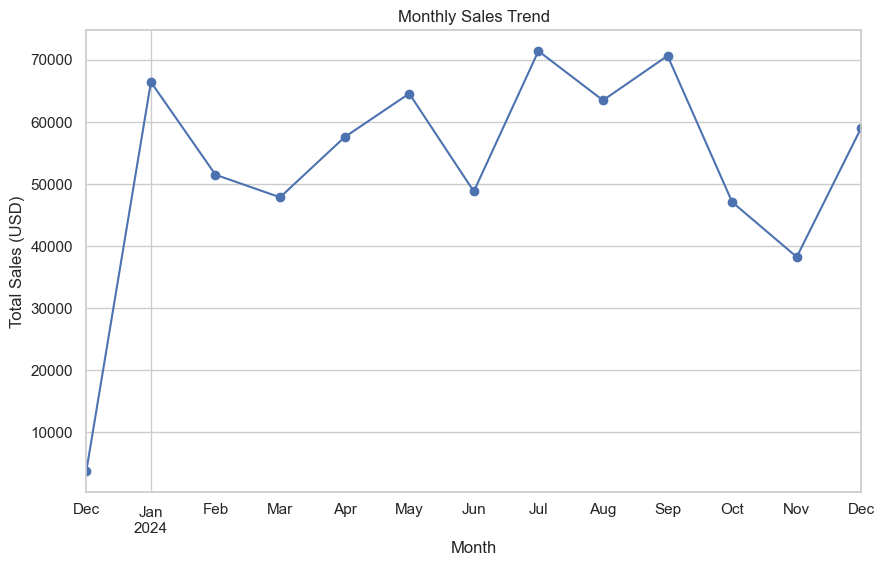

In [63]:
merged_data['Month'] = merged_data['TransactionDate'].dt.to_period('M')
monthly_sales = merged_data.groupby('Month')['TotalValue'].sum()
monthly_sales.plot(kind='line', marker='o', color='b')
plt.title("Monthly Sales Trend")
plt.xlabel("Month")
plt.ylabel("Total Sales (USD)")
plt.savefig('bar3_plot.png')
plt.show()

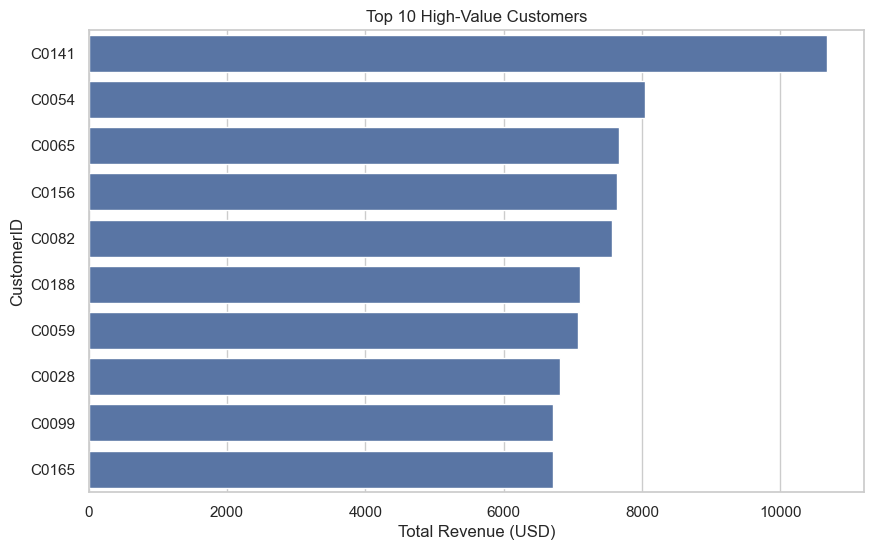

In [65]:
customer_revenue = merged_data.groupby('CustomerID')['TotalValue'].sum().sort_values(ascending=False)
top_customers = customer_revenue.head(10)
sns.barplot(x=top_customers.values, y=top_customers.index, orient='h')
plt.title("Top 10 High-Value Customers")
plt.xlabel("Total Revenue (USD)")
plt.ylabel("CustomerID")
plt.savefig('bar4_plot.png')
plt.show()

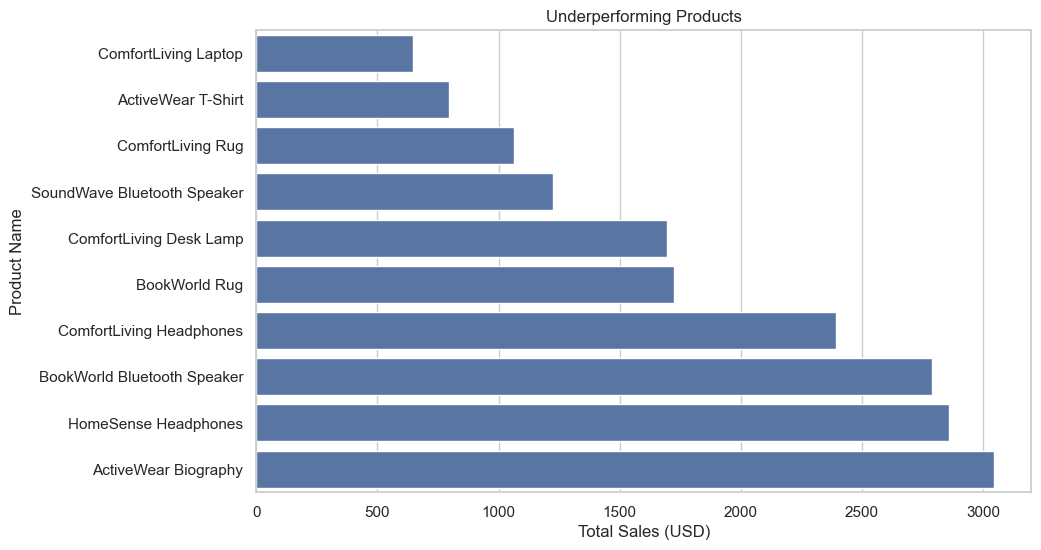

In [67]:
product_sales = merged_data.groupby('ProductName')['TotalValue'].sum().sort_values()
low_selling_products = product_sales.head(10)
sns.barplot(x=low_selling_products.values, y=low_selling_products.index, orient='h')
plt.title("Underperforming Products")
plt.xlabel("Total Sales (USD)")
plt.ylabel("Product Name")
plt.savefig("gg.png")
plt.show()

In [54]:
print("\nBusiness Insights:")
print("1. Customers from South America  account for the majority of the transactions, indicating a strong regional presence.")
print("2. The 'Books' category contributes the highest revenue, making it the most lucrative category.")
print("3. Monthly sales trends reveal peak sales during july and september months, suggesting seasonality.")
print("4. A small group of high-value customers significantly contributes to revenue, with Customer ID C0141 generating over $10,000 in sales; loyalty programs are recommended.")
print("5. Certain products, like the ComfortLiving Laptop, have low sales. Marketing strategies, such as bundling or discounts, could improve their performance.")


Business Insights:
1. Customers from South America  account for the majority of the transactions, indicating a strong regional presence.
2. The 'Books' category contributes the highest revenue, making it the most lucrative category.
3. Monthly sales trends reveal peak sales during july and september months, suggesting seasonality.
4. A small group of high-value customers significantly contributes to revenue, with Customer ID C0141 generating over $10,000 in sales; loyalty programs are recommended.
5. Certain products, like the ComfortLiving Laptop, have low sales. Marketing strategies, such as bundling or discounts, could improve their performance.


In [56]:
merged_data.to_csv("Processed_Merged_Data.csv", index=False)